## 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib_inline.backend_inline import set_matplotlib_formats

from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# 1. 데이터 합치기

In [2]:
part_earn = pd.read_csv('/Users/t2023-m0052/Documents/GitHub/final_project/data/참여적립조인.csv')
part_earn.head() 

,Unnamed: 0,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
cl_part_earn = part_earn.drop(['Unnamed: 0', 'click_key', 'click_day', 'regdate'], axis=1)

In [4]:
domain = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/광고도메인리스트.csv")
domain.head()

,Unnamed: 0,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,0,6508,3u4lOKJAek,13,335,3,10,스마트피싱보호,https://seimg.pincrux.com/icon/1551770735.png,"[상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...",...,9999-12-31 00:00:00,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,금융
1,1,6985,SijDrtH4GV,13,335,3,7,DB손해보험 다이렉트,https://seimg.pincrux.com/icon/1575337232.jpg,[참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...,...,9999-06-06 00:00:00,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,금융
2,2,8327,k1RZftVHoW,13,335,3,10,파일썬,https://static.i-screen.kr/img/ad/icon/aff_13_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,9999-12-31 23:59:00,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,미디어/컨텐츠
3,3,9264,EGZcaVOtlc,23,220,3,10,하나 가득담은 운전자보험가입,https://i.imgur.com/kaWiYyT.png,하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...,...,9999-12-31 23:59:59,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,금융
4,4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활


In [5]:
cl_domain = domain.drop(['Unnamed: 0','ads_icon_img', 'ads_summary', #'ads_sdate', 
                         'ads_age_min', 'ads_age_max',  'ads_contract_price', 'ads_reward_price'], axis = 1)

In [6]:
machesa = cl_part_earn.merge(cl_domain, on = ['ads_idx'], how='left')
machesa.drop(['ads_code_x'], axis = 1, inplace=True)
machesa.rename(columns={"ads_code_y":"ads_code"}, inplace=True)
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain'],
      dtype='object')

In [7]:
machesa.isnull().sum() / machesa.shape[0]

ads_idx            0.000000e+00
dvc_idx            0.000000e+00
mda_idx            0.000000e+00
pub_sub_rel_id     0.000000e+00
contract_price     0.000000e+00
media_price        0.000000e+00
click_time         0.000000e+00
click_date         0.000000e+00
exp_day            0.000000e+00
network            1.484059e-01
user_ip            5.339705e-07
rwd_idx            9.124911e-01
advid              9.129166e-01
adv_cost           9.124911e-01
earn_cost          9.124911e-01
ctit               9.124911e-01
conversion         0.000000e+00
ads_code           0.000000e+00
aff_idx            0.000000e+00
adv_idx            0.000000e+00
ads_type           0.000000e+00
ads_category       0.000000e+00
ads_name           0.000000e+00
ads_save_way       0.000000e+00
ads_day_cap        0.000000e+00
ads_sdate          0.000000e+00
ads_edate          0.000000e+00
ads_os_type        0.000000e+00
ads_order          0.000000e+00
ads_rejoin_type    0.000000e+00
regdate            0.000000e+00
domain  

# 전처리

## 2. 도메인 분포 만들기

In [8]:
domain_dummies = pd.get_dummies(machesa['domain'], prefix = "domain")
df_domain = pd.concat([machesa[['mda_idx']], domain_dummies], axis=1)
domain_features = df_domain.groupby('mda_idx').sum()
domain_features.isna().sum()

domain_게임         0
domain_교육         0
domain_금융         0
domain_기타         0
domain_미디어/컨텐츠    0
domain_뷰티         0
domain_비영리/공공     0
domain_생활         0
domain_식당/카페      0
domain_식음료        0
domain_운동/스포츠     0
domain_운세         0
domain_의료/건강      0
domain_채용         0
domain_커머스        0
dtype: int64

In [9]:
# 비율로 정규화
domain_features = domain_features.div(domain_features.sum(axis=1), axis=0)
domain_features.head()

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,0.808241,0.000000,0.017084,0.000000,0.000228,0.000000,0.031406,0.006363,0.000000,0.002766,0.000000,0.00000,0.000564,0.000000,0.133347
14,0.458526,0.000000,0.041999,0.000672,0.185871,0.070090,0.000000,0.073711,0.000000,0.075941,0.000000,0.00000,0.056746,0.010476,0.025967
18,0.556115,0.000000,0.153330,0.000000,0.179500,0.000000,0.000000,0.103506,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.007549
22,0.446764,0.000192,0.141035,0.000000,0.191542,0.006358,0.057741,0.034395,0.000348,0.013652,0.004403,0.00048,0.029536,0.037862,0.035691
26,0.623894,0.000000,0.060472,0.000000,0.029499,0.000000,0.000000,0.169617,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.116519


## 3. 광고유형 분포

In [10]:
type_dummies = pd.get_dummies(machesa['ads_type'], prefix='type')
df_type = pd.concat([machesa['mda_idx'], type_dummies], axis = 1)
type_features = df_type.groupby('mda_idx').sum()
type_features = type_features.div(type_features.sum(axis = 1), axis = 0)
type_features

,type_1,type_2,type_3,type_4,type_5,type_7,type_9,type_10,type_11,type_12
mda_idx,,,,,,,,,,
12,0.789712,0.099510,0.110752,0.0,0.000026,0.000000,0.0,0.00000,0.0,0.0
14,0.366280,0.106155,0.308106,0.0,0.044949,0.040230,0.0,0.13428,0.0,0.0
18,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
22,0.493720,0.180409,0.288345,0.0,0.002447,0.035079,0.0,0.00000,0.0,0.0
26,0.126844,0.420354,0.452802,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1050,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
1051,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
1055,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,1.0


## 4. 광고 카테고리 분포

In [11]:
category_dummies = pd.get_dummies(machesa['ads_category'], prefix='category')
df_category = pd.concat([machesa['mda_idx'], category_dummies], axis = 1)
category_features = df_category.groupby('mda_idx').sum()
category_features = category_features.div(category_features.sum(axis = 1), axis = 0)
category_features

,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
mda_idx,,,,,,,,,,,,
12,0.055038,0.263231,0.570952,0.014748,0.0,0.000000,0.0,0.000000,0.096030,0.000000,0.0,0.000000
14,0.000000,0.202447,0.269988,0.250451,0.0,0.123002,0.0,0.000283,0.150455,0.003374,0.0,0.000000
18,0.000000,0.000000,0.000000,0.000000,0.0,0.660795,0.0,0.000000,0.334843,0.004362,0.0,0.000000
22,0.154484,0.066331,0.453338,0.092532,0.0,0.002675,0.0,0.003371,0.222482,0.004787,0.0,0.000000
26,0.000000,0.000000,0.547198,0.000000,0.0,0.234513,0.0,0.000000,0.206490,0.011799,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000
1051,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1055,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000


In [25]:
# 전체 참여정보로 봤을 때의 카테고리 분포
ad_category = machesa.groupby(['ads_category']).size().reset_index()
ad_category['ratio'] = ad_category[0]/ machesa.shape[0]
ad_category.columns = ['ads_category', 'clicks', 'clicks_ratio']
ad_category.sort_values('clicks_ratio', ascending=False)

,ads_category,clicks,clicks_ratio
5,5,12512623,0.742375
2,2,2626057,0.155804
1,1,579558,0.034385
4,4,461730,0.027394
8,8,216208,0.012828
9,10,140463,0.008334
0,0,126837,0.007525
3,3,107930,0.006403
11,13,29908,0.001774
10,11,21709,0.001288


In [27]:
# 적립만 봤을 때의 카테고리 분포
temp = machesa[machesa.rwd_idx.notna()].groupby(['ads_category']).size().reset_index()
temp['ratio'] = temp[0]/ machesa[machesa.rwd_idx.notna()].shape[0]
temp.columns = ['ads_category', 'convert', 'convert_cnt_ratio']
ad_category = ad_category.merge(temp, on = 'ads_category', how = 'left')
ad_category['cvr'] = ad_category['convert'] / ad_category['clicks']
ad_category.sort_values('convert_cnt_ratio', ascending=False)

,ads_category,clicks,clicks_ratio,convert,convert_cnt_ratio,cvr
2,2,2626057,0.155804,875132,0.593330,0.333249
4,4,461730,0.027394,269652,0.182821,0.584004
1,1,579558,0.034385,168463,0.114216,0.290675
0,0,126837,0.007525,68029,0.046123,0.536350
3,3,107930,0.006403,42175,0.028594,0.390763
11,13,29908,0.001774,23179,0.015715,0.775010
8,8,216208,0.012828,16825,0.011407,0.077819
10,11,21709,0.001288,6151,0.004170,0.283339
6,6,16862,0.001000,3402,0.002307,0.201755
5,5,12512623,0.742375,1400,0.000949,0.000112


## 5. 규모 정보 (합계 / 평균)

#### 클릭

In [14]:
## 이걸로 사용하기 !! 광고 집행 건수는 idx nunique값이라
scale_features = machesa.groupby('mda_idx').agg({
    'contract_price':['mean', 'median', 'sum', 'max', 'min'],
    'media_price':['mean', 'median', 'sum', 'max', 'min'],
    'adv_cost': ['mean', 'median', 'sum', 'max', 'min'],
    'earn_cost':['mean', 'median', 'sum', 'max', 'min'],
    'ads_idx':'nunique'# ,
    # 'device'
    })
scale_features

contract_price                                    media_price          \
                  mean   median        sum    max    min         mean  median   
mda_idx                                                                         
12          267.335255    180.0   62138872   2000    130   211.075513   150.0   
14         1920.342390    230.0  162773982  30000    170  1408.739662   160.0   
18        12072.960242   7800.0   71966916  33600   1200  8736.873008  5800.0   
22          333.194745    190.0   27773448  33600    150   238.063727   150.0   
26         2366.755162    280.0    1604660  20400    190  1716.622419   230.0   
...                ...      ...        ...    ...    ...          ...     ...   
1050         16.000000     16.0         16     16     16    11.000000    11.0   
1051          3.000000      3.0          3      3      3     2.000000     2.0   
1055      19646.333333  14757.0      58939  29425  14757   720.000000   515.0   
1059          2.000000      2.0         12      2      2     2.000000     2.0   
1061         20.444444      5.0        184    150      2    16.000000     5.0   

                                ... adv_cost                               \
               sum    max  min  ...   median         sum      max     min   
mda_idx                         ...                                         
12        49061970   1000   90  ...    180.0  16180208.0   2000.0   130.0   
14       119409000  22000  120  ...    190.0   9934357.0  30000.0   170.0   
18        52080500  25000  900  ...   1200.0    717016.0  21600.0  1200.0   
22        19843802  25000  100  ...    190.0   8605200.0  14000.0   150.0   
26         1163870  14000  170  ...    280.0     17170.0    280.0   190.0   
...            ...    ...  ...  ...      ...         ...      ...     ...   
1050            11     11   11  ...     16.0        16.0     16.0    16.0   
1051             2      2    2  ...      NaN         0.0      NaN     NaN   
1055          2160   1130  515  ...      NaN         0.0      NaN     NaN   
1059            12      2    2  ...      NaN         0.0      NaN     NaN   
1061           144    110    2  ...      5.0        19.0      5.0     2.0   

           earn_cost                                    ads_idx  
                mean median         sum      max    min nunique  
mda_idx                                                          
12        158.872170  150.0  13176540.0   1000.0   90.0      24  
14        313.310273  150.0   7200810.0  22000.0  120.0      59  
18       2138.600000  900.0    534650.0  16200.0  900.0      23  
22        172.100079  120.0   6063430.0  10500.0  100.0     166  
26        206.857143  230.0     14480.0    230.0  170.0      19  
...              ...    ...         ...      ...    ...     ...  
1050       11.000000   11.0        11.0     11.0   11.0       1  
1051             NaN    NaN         0.0      NaN    NaN       1  
1055             NaN    NaN         0.0      NaN    NaN       2  
1059             NaN    NaN         0.0      NaN    NaN       1  
1061        3.800000    5.0        19.0      5.0    2.0       3  

[189 rows x 21 columns]

count     189.000000
mean      115.333333
std       561.917661
min         1.000000
25%         9.000000
50%        23.000000
75%        28.000000
max      6563.000000
Name: ads_idx, dtype: float64


<Axes: ylabel='ads_idx'>

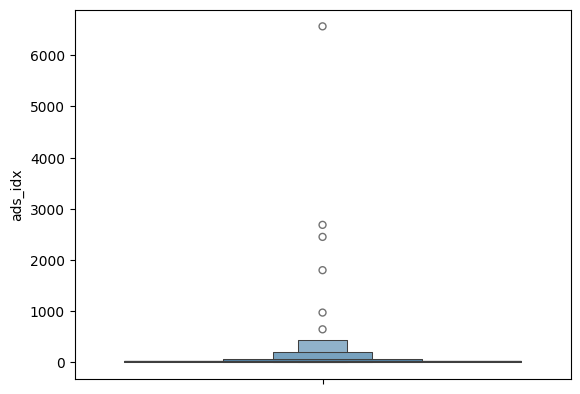

In [15]:
print(machesa.groupby('mda_idx')['ads_idx'].nunique().describe())
sns.boxenplot(machesa.groupby('mda_idx')['ads_idx'].nunique()) # 제일 광고 집행 건수가 많은 563


count     189.000000
mean      114.751323
std       561.563250
min         1.000000
25%         9.000000
50%        22.000000
75%        28.000000
max      6562.000000
Name: ads_code, dtype: float64


<Axes: ylabel='ads_code'>

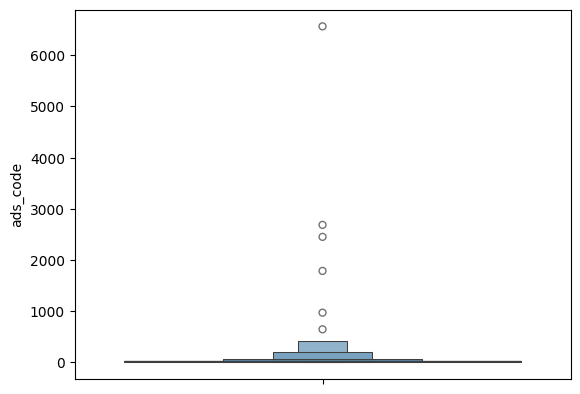

In [16]:
## pd.options.display.float_format = '{:.5f}'.format  # .5 부분은 소숫점 자리수
print(machesa.groupby('mda_idx')['ads_code'].nunique().describe())
sns.boxenplot(machesa.groupby('mda_idx')['ads_code'].nunique()) # 제일 광고 집행 건수가 많은 563

### 규모 나누기

In [17]:
def separate_scale(x):
    '''
    매체사 규모를 나누는 함수
    '''
    if x < 11:
        return '테스트형 매체사'
    elif x <= 50:
        return '소규모 운영'
    elif x <= 200:
        return '중간 규모'
    else: # x <= 2000:
        return '대규모 운영'

    
scale_features['ads_idx']['scale_label'] = scale_features['ads_idx']['nunique'].apply(lambda x: separate_scale(x))
scale_features['ads_idx']['nunique'].apply(lambda x: separate_scale(x)).reset_index().value_counts('nunique')

/var/folders/4n/w27drm2j3_v05ss9qbg_6qsc0000gn/T/ipykernel_16184/4000947897.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scale_features['ads_idx']['scale_label'] = scale_features['ads_idx']['nunique'].apply(lambda x: separate_scale(x))


nunique
소규모 운영      100
테스트형 매체사     55
중간 규모        22
대규모 운영       12
Name: count, dtype: int64

### user ip, device id

In [18]:
print(machesa.groupby('mda_idx')[['ads_idx', 'user_ip', 'dvc_idx']].nunique().describe())
look_scale = machesa.groupby('mda_idx')[['ads_idx', 'user_ip', 'dvc_idx']].nunique().reset_index()
look_scale

           ads_idx        user_ip        dvc_idx
count   189.000000     189.000000     189.000000
mean    115.333333    5109.185185    6261.005291
std     561.917661   14174.362751   19113.594425
min       1.000000       1.000000       1.000000
25%       9.000000      41.000000      23.000000
50%      23.000000    1622.000000    1764.000000
75%      28.000000    4400.000000    3840.000000
max    6563.000000  113648.000000  169122.000000


,mda_idx,ads_idx,user_ip,dvc_idx
0,12,24,41747,75700
1,14,59,33285,31834
2,18,23,3244,2825
3,22,166,23495,37668
4,26,19,418,402
...,...,...,...,...
184,1050,1,1,1
185,1051,1,1,1
186,1055,2,2,1
187,1059,1,5,1


In [19]:
def separate_scale(x):
    '''
    매체사 규모를 나누는 함수
    '''
    if x < 11:
        return 1 # '테스트형 매체사'
    elif x <= 50:
        return 2 # '소규모 운영'
    elif x <= 200:
        return 3 # '중간 규모'
    else: # x <= 2000:
        return 4 # '대규모 운영'

def separate_user_scale(x):
    '''
    매체사 사용자 규모를 나누는 함수
    '''
    if x < 1000:
        return 1 # 소규모
    elif x < 10000:
        return 2 # 중규모
    else:
        return 3 # 대규모
    
look_scale['ads_scale_index'] = look_scale['ads_idx'].apply(separate_scale)
look_scale['dvc_scale_index'] = look_scale['dvc_idx'].apply(separate_user_scale)
look_scale.value_counts(['ads_scale_index', 'dvc_scale_index'])

ads_scale_index  dvc_scale_index
2                2                  74
1                1                  42
2                1                  20
3                1                  13
1                2                  10
2                3                   6
4                1                   6
3                2                   5
4                2                   5
3                3                   4
1                3                   3
4                3                   1
Name: count, dtype: int64

<Axes: xlabel='ads_scale_index', ylabel='dvc_scale_index'>

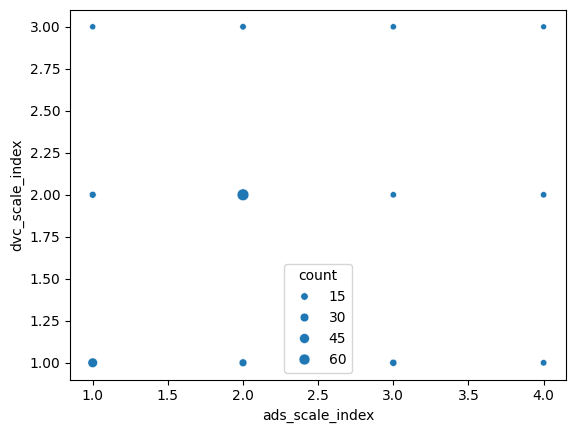

In [20]:
df = look_scale.value_counts(['ads_scale_index', 'dvc_scale_index']).reset_index()
sns.scatterplot(x= df['ads_scale_index'], y = df['dvc_scale_index'],size = df['count'])

### 매체사 714 확인

In [28]:
print(machesa[machesa['mda_idx'] == 714][['ads_type', 'ads_category', 'ads_save_way', 'ads_day_cap', 'ads_os_type', 'ads_rejoin_type']].nunique()) 
# type: 12:CPS(물건구매), category: 11: 쇼핑-상품별카테고리(쇼핑적립), save_way: 구매, ads_day_cap: False, ads_os_type: 7(Web)
machesa[machesa['mda_idx'] == 714]

ads_type           1
ads_category       1
ads_save_way       1
ads_day_cap        1
ads_os_type        1
ads_rejoin_type    1
dtype: int64


,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_time,click_date,exp_day,network,...,ads_name,ads_save_way,ads_day_cap,ads_sdate,ads_edate,ads_os_type,ads_order,ads_rejoin_type,regdate,domain
4025,150779,0,714,1,4454,2800,8,2025-08-23 08:30:32,2025-09-22,WIFI,...,류현진 데이렉스 엑소좀겔 마사지 크림 50g,구매,False,2025-01-31 10:00:00,9999-12-31 00:00:00,7,1544829,REJOINABLE,2025-01-31 10:57:17 UTC,뷰티
15641,111615,0,714,1,34650,22500,3,2025-07-31 03:58:38,2025-08-30,WIFI,...,[쎄븐업플러스]철갑상어 건강즙 70ml 30포,구매,False,2024-10-31 10:00:00,9999-12-31 00:00:00,7,1525814,REJOINABLE,2024-10-31 10:17:08 UTC,의료/건강
18293,53592,0,714,1,6818,4400,8,2025-07-29 08:23:04,2025-08-28,WIFI,...,짐스낵 다이어트 간식 프로틴 단백질 쿠키 과자,구매,False,2024-06-21 10:00:00,9999-12-31 00:00:00,7,1554608,REJOINABLE,2024-06-21 10:44:52 UTC,운동/스포츠
23474,53626,0,714,1,5363,3400,13,2025-07-30 13:41:28,2025-08-29,WIFI,...,[동원] 리챔 더블라이트 200g X 8캔,구매,False,2024-06-21 11:00:00,9999-12-31 00:00:00,7,1586953,REJOINABLE,2024-06-21 11:59:05 UTC,식음료
36203,146798,0,714,1,6090,3900,4,2025-08-11 04:40:17,2025-09-10,WIFI,...,면세점입점 나틴다 승무원팩트 실키커버 21호,구매,False,2025-01-23 17:00:00,9999-12-31 00:00:00,7,1369610,REJOINABLE,2025-01-23 17:39:38 UTC,뷰티
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16822156,157249,0,714,1,5272,3400,23,2025-08-19 23:05:27,2025-09-18,WIFI,...,[지리산마천농협] 6년근 녹용홍삼진 30포,구매,False,2025-02-17 11:00:00,9999-12-31 00:00:00,7,1314904,REJOINABLE,2025-02-17 11:17:31 UTC,커머스
16831203,119136,0,714,1,10000,6500,5,2025-08-08 05:35:22,2025-09-07,WIFI,...,ihee 헤어클리닉 극산성복구 애시드 클리닉,구매,False,2024-11-25 16:00:00,9999-12-31 00:00:00,7,1369044,REJOINABLE,2024-11-25 16:11:48 UTC,뷰티
16838690,438221,0,714,1,2363,1500,10,2025-08-01 10:58:39,2025-08-31,WIFI,...,키친플래그 다용도 극세사 행주 5종 세트,구매,False,2025-07-29 13:00:00,9999-12-31 00:00:00,7,1252277,REJOINABLE,2025-07-29 13:59:56 UTC,커머스
16842911,150763,0,714,1,6000,3900,9,2025-08-11 09:28:06,2025-09-10,WIFI,...,[여드름성 피부특화] 카밍 리프래쉬 클렌징 폼,구매,False,2025-01-31 10:00:00,9999-12-31 00:00:00,7,1541612,REJOINABLE,2025-01-31 10:12:06 UTC,뷰티


In [29]:
machesa.loc[machesa['mda_idx'].isin([ 980,  654,  714,  540,  583,  755, 1055, 1042,  769,  480,  978,
        787,  481,   73, 1023,  437, 1050,  539, 1049,  398,  710]), ['mda_idx', 'dvc_idx']].groupby('mda_idx').nunique()
# device_idx가 0만 있는 웹인 매체사만 있는 곳
# [980,  654,  714,  755, 1055, 1042,  769,  480,  978,  787,  481, 1023,  437, 1050,  1049,  710]
## 매체 구분을 했을 때 여기가 달라졌다면 왜 달라졌는지 알기


,dvc_idx
mda_idx,
73,3
398,3267
437,1
480,1
481,1
539,97895
540,3160
583,3080
654,1


In [30]:
look_scale[look_scale['mda_idx'].isin([980,  654,  714,  755, 1055, 1042,  769,  480,  978,  787,  481, 1023,  437, 1050,  1049,  710])]

,mda_idx,ads_idx,user_ip,dvc_idx,ads_scale_index,dvc_scale_index
39,437,1,1,1,1,1
42,480,50,28,1,2,1
43,481,22,10,1,2,1
68,654,3,12199,1,1,1
89,710,3,3,1,1,1
91,714,338,904,1,4,1
99,755,8,6,1,1,1
107,769,13,2,1,2,1
112,787,12,27,1,2,1
145,978,56,69,1,3,1


In [ ]:
for i in [980,  654,  714,  755, 1055, 1042,  769,  480,  978,  787,  481, 1023,  437, 1050,  1049,  710]:
    print(f"======== 매체사 아이디: {i} ========")
    print(machesa[machesa['mda_idx'] == i][['ads_type', 'ads_category', 'ads_save_way', 'ads_day_cap', 'ads_os_type', 'ads_rejoin_type']].agg(['nunique', 'unique'])) 
# type: 12:CPS(물건구매), category: 11: 쇼핑-상품별카테고리(쇼핑적립), save_way: 구매, ads_day_cap: False, ads_os_type: 7(Web)
    print(machesa[machesa['mda_idx'] == i].head())

======== 매체사 아이디: 980 ========
        ads_type ads_category ads_save_way ads_day_cap ads_os_type  \
nunique        1            1            1           1           1   
unique      [12]         [11]         [구매]     [False]         [7]   

        ads_rejoin_type  
nunique               1  
unique     [REJOINABLE]  
      ads_idx  dvc_idx  mda_idx  pub_sub_rel_id  contract_price  media_price  \
478    130275        0      980               1           88275         3490   
3473   429485        0      980               1           87120         3400   
4319   429485        0      980               1           87120         3400   
5334   130275        0      980               1           88275         3490   
7173   426192        0      980               1            2904          100   

      click_time           click_date     exp_day network  ...  \
478           23  2025-07-30 23:16:27  2025-08-29     NaN  ...   
3473          22  2025-08-03 22:52:49  2025-09-02     NaN  ...   
4

In [ ]:
m_ad_list = machesa.groupby(['mda_idx', 'domain'])['ads_idx'].nunique().reset_index(name = 'ads_idx_nunique')
m_ad_list